In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import scipy.stats as stats

In [2]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 10}

mpl.rc('font', **font)

In [15]:
savefilesto = '/Volumes/SAF_Data/AGU_Poster2021/'

In [4]:
combinednm = 'agubh2-10km-allpkgdata.xlsx'
modelrun = '0hfld-agubh2_10km/'

mypath = '/Volumes/SAF_Data/NAYS2DH_files/Data/BarCSVs/'+combinednm
savefilesto = '/Volumes/SAF_MSCWORK/Python/Stratigraphy/Plots/barpkgs/'

LA = pd.read_excel(mypath, sheet_name = 'LA', usecols =' A:AB', nrows = 40)
SM = pd.read_excel(mypath, sheet_name = 'SM', usecols =' A:AB', nrows = 22)
DEF = pd.read_excel(mypath, sheet_name = 'DEF', usecols =' A:AB', nrows = 46)

allbars = pd.read_excel(f'{mypath}', sheet_name = 'agubh2-10km-allpkgdata', usecols = 'A:S', nrows=106)
#allbars = allbars.iloc[:, 1:19]

In [5]:
### create dataframes for all the attributes
elapsed_time = pd.concat([LA['time_int_hrs'], DEF['time_int_hrs'], SM['time_int_hrs']], axis = 1) ## time_int_hrs
packagewidth = pd.concat([LA['barwidth'], DEF['barwidth'], SM['barwidth']], axis = 1) #barwidth
depth = pd.concat([LA['depth_max'], DEF['depth_max'], SM['depth_max']], axis = 1) ##max flow depth
depthcv = pd.concat([LA['depthCV'], DEF['depthCV'], SM['depthCV']], axis = 1) ## cv of depth
xsarea =  pd.concat([LA['xsarea'], DEF['xsarea'], SM['xsarea']], axis = 1) ##xsarea
package_area = pd.concat([LA['pkg_area'], DEF['pkg_area'], SM['pkg_area']], axis = 1) ##pkg_area
perc_area  = pd.concat([LA['% of area'], DEF['% of area'], SM['% of area']], axis = 1) ## % of area rep by bar package
median_height = pd.concat([LA['median_height'], DEF['median_height'], SM['median_height']], axis = 1) ## median height
mean_height = pd.concat([LA['mean_height'], DEF['mean_height'], SM['mean_height']], axis = 1)## mean height
mode_height = pd.concat([LA['modal_height'], DEF['modal_height'], SM['modal_height']], axis = 1)## mean height
whr = pd.concat([LA['W-H_bar'], DEF['W-H_bar'], SM['W-H_bar']], axis = 1) ##W-H_bar
package_height = pd.concat([LA['pkg height'], DEF['pkg height'], SM['pkg height']], axis = 1) ##pkg height
pkg_flowdep = np.true_divide(package_height, depth, where = ~np.isnan(package_height)) ## height of package relative to flow depth
bh_flowdep = np.true_divide(mode_height, depth, where = ~np.isnan(mode_height)) ## height of clinothem relative to flow depth
pkg_modeht = np.true_divide(mode_height, package_height, where = ~np.isnan(package_height)) ## height of package relative to flow depth
pkg_qs = np.true_divide(package_area, 91, where = ~np.isnan(package_area)) ## height of package relative to flow depth

corevar_list = [elapsed_time, packagewidth, package_height, depth, depthcv, xsarea, package_area, perc_area, median_height, mean_height, whr, pkg_flowdep]
colours = ['#29abec', '#ff3300', '#4000ff'] ## LA, def, sm
labels = ['steady growth', 'deformation', 'pulsed growth']
corevar_nmlist = ['Length of time during depositon, 2hr',
                  'Unit Width, m',
                  'Unit Height, m',
                  'Maximum flow depth, m',
                  'CV of flow depth',
                  'Cross-sectional area, m2',
                  'Area of package, m2',
                  'Package proportion of area, %',
                  'Median internal package height, m',
                  'Mean internal package height, m',
                  'Width:Height Ratio of package',
                  'Package heigth/flow depth'
                 ]

/var/folders/yg/89nlrh5x2xzgdlgr2bczm4_m0000gn/T/ipykernel_96249/1360694033.py:14: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  pkg_flowdep = np.true_divide(package_height, depth, where = ~np.isnan(package_height)) ## height of package relative to flow depth
/var/folders/yg/89nlrh5x2xzgdlgr2bczm4_m0000gn/T/ipykernel_96249/1360694033.py:15: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first Data

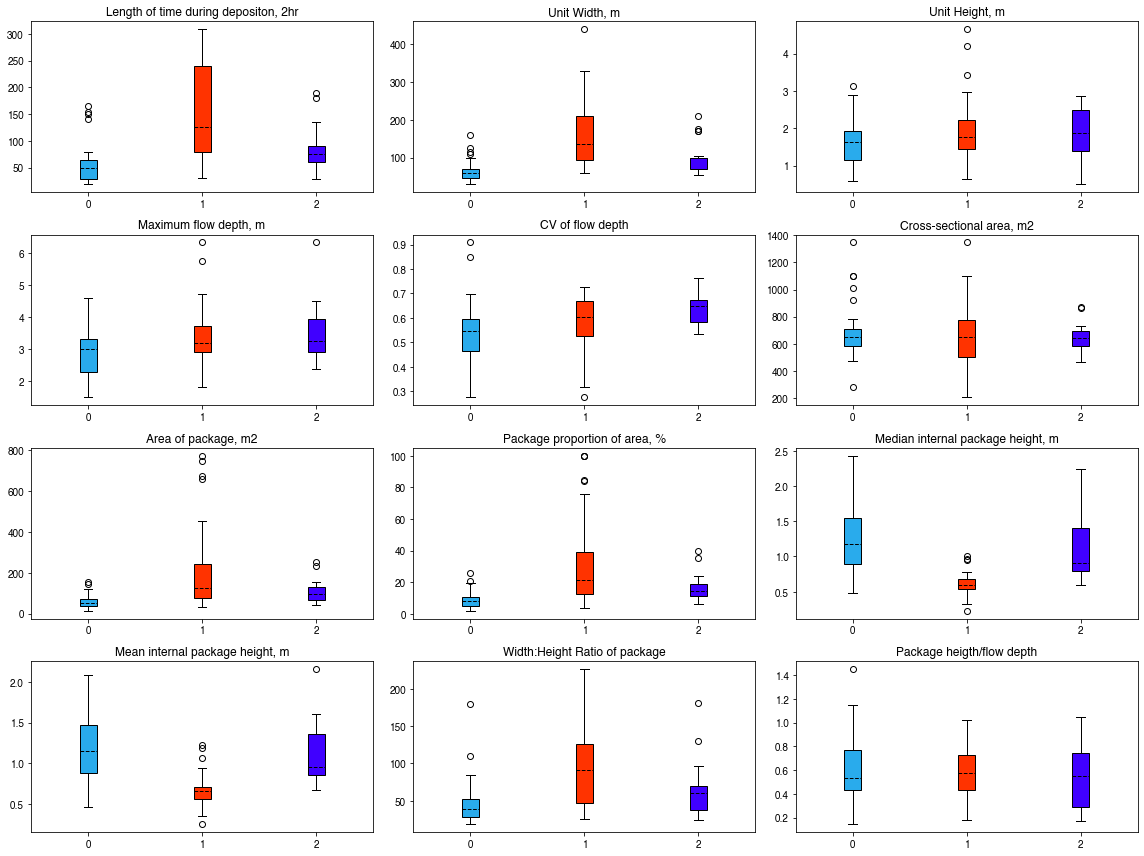

In [6]:
fig, ax = plt.subplots(4, 3, figsize = (16, 12), tight_layout = True)
ax = ax.ravel()
medianprops = dict(linestyle='--', linewidth=1, color='k')
boxprops = dict(linestyle='--', linewidth=1, color='black')
for idx, var in enumerate(corevar_list):
    bplotla = ax[idx].boxplot(var.iloc[:39, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops)
    bplotsm = ax[idx].boxplot(var.iloc[:45, 1], patch_artist = True, positions = [1], boxprops=boxprops, medianprops=medianprops)
    bplotdef = ax[idx].boxplot(var.iloc[:21, 2], patch_artist = True, positions = [2], boxprops=boxprops, medianprops=medianprops)
    bplotlist = [bplotla, bplotsm, bplotdef]    

    ax[idx].set_title(corevar_nmlist[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
    

# plt.savefig('testforai.pdf')

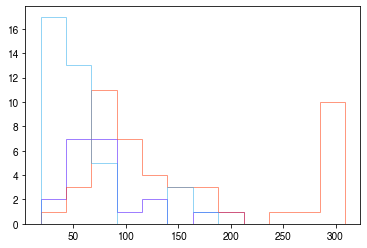

In [7]:
plt.hist(elapsed_time, color = colours, histtype = 'step', alpha = 0.5, bins = 12);

Text(0.5, 0, 'Elapsed time, 2hr')

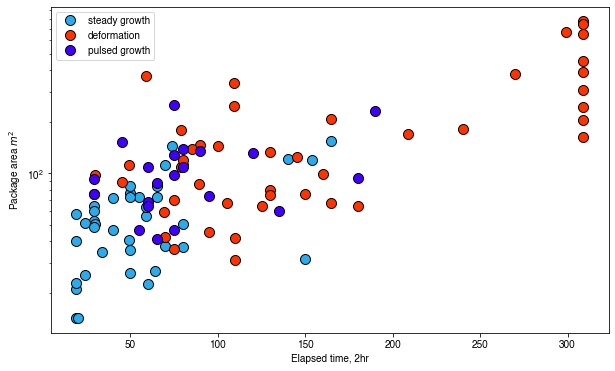

In [8]:
plt.figure(figsize = (10, 6))
plt.semilogy(elapsed_time.iloc[:39, 0], package_area.iloc[:39, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:45, 1], package_area.iloc[:45, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'deformation', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:21, 2], package_area.iloc[:21, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 10)
plt.legend()
plt.ylabel('Package area $m^2$')
plt.xlabel('Elapsed time, 2hr')

Text(0.5, 0, 'Elapsed time, 2hr')

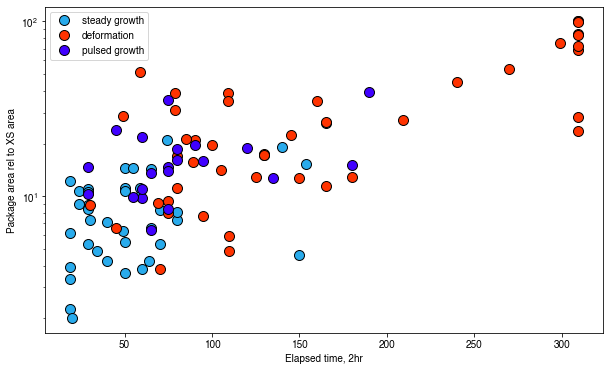

In [9]:
plt.figure(figsize = (10, 6))
plt.semilogy(elapsed_time.iloc[:39, 0], perc_area.iloc[:39, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:45, 1], perc_area.iloc[:45, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'deformation', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:21, 2], perc_area.iloc[:21, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 10)
plt.legend()
plt.ylabel('Package area rel to XS area')
plt.xlabel('Elapsed time, 2hr')

Text(0.5, 0, 'Package Width, m')

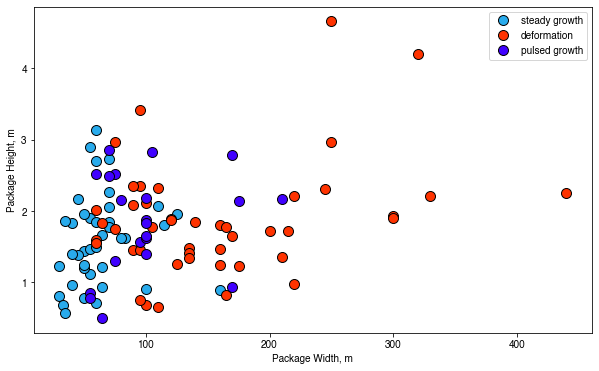

In [10]:
plt.figure(figsize = (10, 6))
plt.plot(packagewidth.iloc[:39, 0], package_height.iloc[:39, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 10)
plt.plot(packagewidth.iloc[:45, 1], package_height.iloc[:45, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'deformation', lw = 0, ms = 10)
plt.plot(packagewidth.iloc[:21, 2], package_height.iloc[:21, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 10)
plt.legend()
plt.ylabel('Package Height, m')
plt.xlabel('Package Width, m')

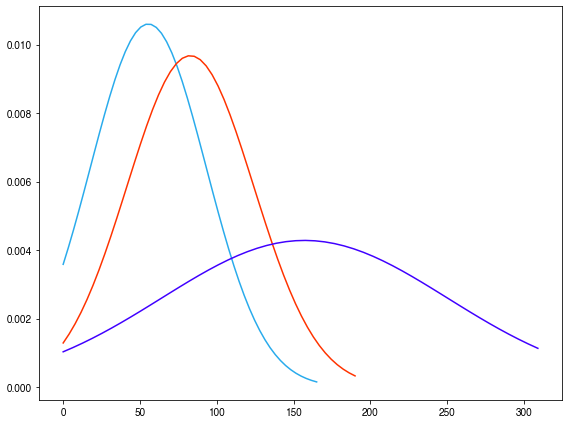

In [11]:
plt.figure(figsize = (8,6), tight_layout = True)
for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['time_int_hrs'])
    scale = np.std(var['time_int_hrs'])

    x = np.linspace(0, var['time_int_hrs'].max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])

#plt.xlim(0,310)
#plt.ylim(0, 1)

In [12]:
sections = np.unique(allbars['iloc'])
sectiondist = np.empty([len(sections), 3])
for i, iloc in enumerate(sections):
    inthere = allbars['pkg_type'][allbars['iloc']==iloc] ##find the facies in each section
    ## count the number of each facies
    sectiondist[i, 1] = np.sum(inthere.str.count("DEF"))
    sectiondist[i, 2] = np.sum(inthere.str.count("SM"))
    sectiondist[i, 0] = np.sum(inthere.str.count("LA"))

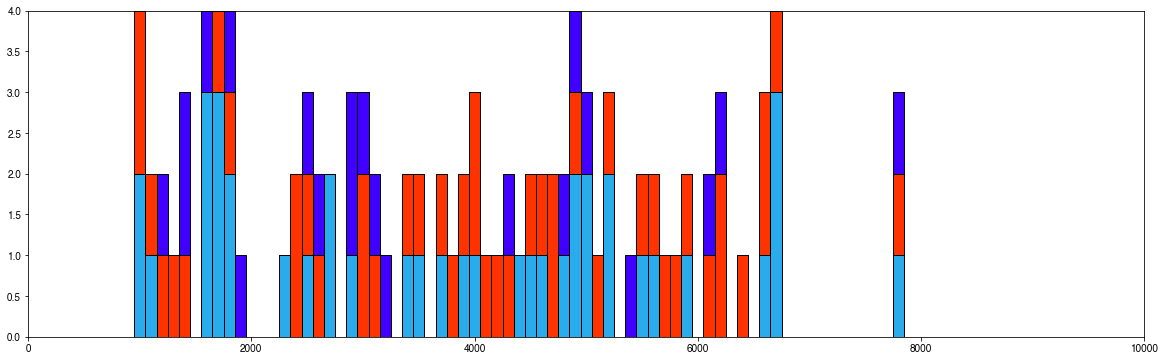

In [13]:
plt.figure(figsize = (20, 6))
plt.xlim(0, 10000)
w=100
for i in range(0, len(sectiondist)):
    plt.bar(sections[i]*10, sectiondist[i, 0], w, color=colours[0], ec = 'k')
for x in range (0, len(sections)):
    for i in [1, 2]:
        #fac = plt.bar(x, xs_freq[i, x], w, bottom = np.sum(xs_freq[:i, x]), color = clist[i])
        plt.bar(sections[x]*10, sectiondist[x, i], w, bottom = np.sum(sectiondist[x, :i]), color = colours[i], ec = 'k')
ax=plt.gca()


## Cluster 1--Geometric relationships

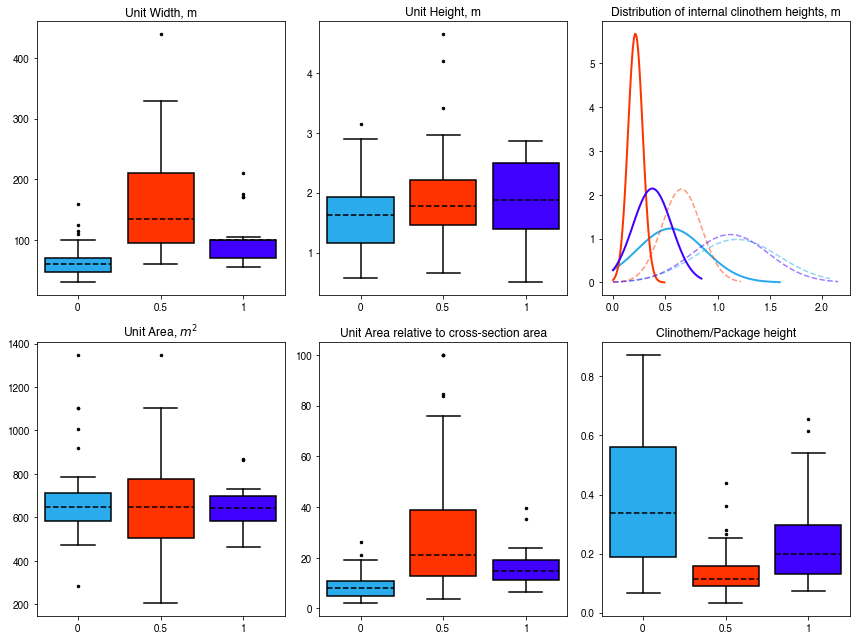

In [35]:
fig, ax = plt.subplots(2, 3, figsize = (12, 9), tight_layout = True, sharex = False, squeeze = True)

ax = ax.ravel()

medianprops = dict(linestyle='--', linewidth=1.5, color='k')
boxprops = dict(linestyle='--', linewidth=1.5, color='black')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')
capprops = dict(linestyle='-', linewidth=1.5, color='black')
bplotaxes = [0, 1, 3, 4, -1]
flierprops = dict(marker = 'o', markersize = '2.5', color = 'black', mfc = 'k')
for a in bplotaxes:
    ax[a].set_xlim(-0.25, 1.25)
vlist = [packagewidth, package_height, xsarea, perc_area, pkg_modeht]
vnmlist = ['Unit Width, m', 'Unit Height, m', 'Unit Area, $m^2$', 'Unit Area relative to cross-section area', 'Clinothem/Package height']

colours = ['#29abec', '#ff3300', '#4000ff'] ## LA, def, sm
for idx, var in enumerate(vlist):
    bplotla = ax[bplotaxes[idx]].boxplot(var.iloc[:39, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotsm = ax[bplotaxes[idx]].boxplot(var.iloc[:45, 1], patch_artist = True, positions = [0.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotdef = ax[bplotaxes[idx]].boxplot(var.iloc[:21, 2], patch_artist = True, positions = [1], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotlist = [bplotla, bplotsm, bplotdef]    

    ax[bplotaxes[idx]].set_title(vnmlist[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
    
for i, var in enumerate([LA, DEF, SM]):
    locme = np.nanmean(var['mean_height']) #mean
    scaleme = np.std(var['mean_height'])
    
    locmo = np.nanmean(var['modal_height']) #mode
    scalemo = np.std(var['modal_height'])
    
    locmd = np.nanmean(var['median_height']) #median
    scalemd = np.std(var['median_height'])

    xme = np.linspace(0, var['mean_height'].max())
    yme = stats.norm.pdf(xme, locme, scaleme)
    xmo = np.linspace(0, var['modal_height'].max())
    ymo = stats.norm.pdf(xmo, locmo, scalemo)
    xmd = np.linspace(0, var['median_height'].max())
    ymd = stats.norm.pdf(xmd, locmd, scalemd)
    
    ax[2].set_title('Distribution of internal clinothem heights, m')
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    me = ax[2].plot(xme, yme, label = labels[i], c = colours[i], ls = '--', alpha = 0.5)
    mo = ax[2].plot(xmo, ymo, c = colours[i], ls = '-', lw = 2)
    #md = ax[2].plot(xmd, ymd, c = colours[i], ls = '-.', alpha = 0.5)
#    x.boxplot([values_cg, values_eg], widths=1)
#ax[2].legend([5, 6], labels = ['Median', 'Mode'])
plt.savefig(f'{savefilesto}clus1-boxplots.png', dpi = 300)

#### Cluster 2--relative to flow

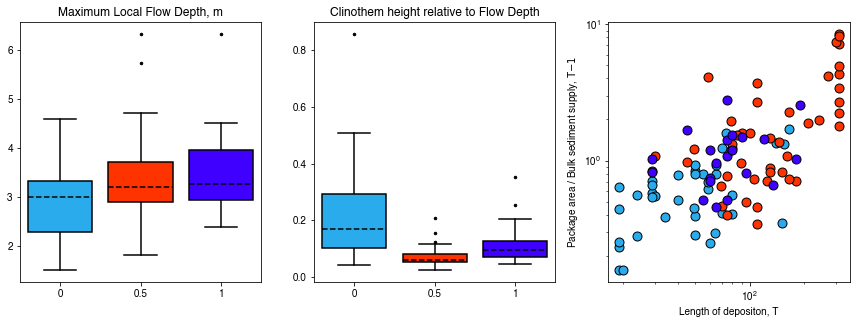

In [36]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4.6), tight_layout = True, squeeze = True)
ax[0].set_xlim(-0.25, 1.25)
ax[1].set_xlim(-0.25,1.25)
ax = ax.ravel()
bplotaxes = [0, 1]
vlist = [depth, bh_flowdep]
vnmlist = ['Maximum Local Flow Depth, m', 'Clinothem height relative to Flow Depth']# 'Unit Area, $m^2$', 'Unit Area relative to cross-section area', 'Clinothem/Package height']

colours = ['#29abec', '#ff3300', '#4000ff'] ## LA, def, sm
for idx, var in enumerate(vlist):
    bplotla = ax[bplotaxes[idx]].boxplot(var.iloc[:39, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotsm = ax[bplotaxes[idx]].boxplot(var.iloc[:45, 1], patch_artist = True, positions = [0.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotdef = ax[bplotaxes[idx]].boxplot(var.iloc[:21, 2], patch_artist = True, positions = [1], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotlist = [bplotla, bplotsm, bplotdef]    

    ax[bplotaxes[idx]].set_title(vnmlist[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
    
ax[2].loglog(elapsed_time.iloc[:39, 0], pkg_qs.iloc[:39, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 9)
ax[2].loglog(elapsed_time.iloc[:45, 1], pkg_qs.iloc[:45, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'reworking', lw = 0, ms = 9)
ax[2].loglog(elapsed_time.iloc[:21, 2], pkg_qs.iloc[:21, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 9)
ax[2].set_ylabel('Package area / Bulk sediment supply, T$-1$')
ax[2].set_xlabel('Length of depositon, T')
plt.savefig(f'{savefilesto}clus2-boxplots.png', dpi = 200)

In [15]:
crosatom = ((0.17*9.81)*(-7*(50**3)*-0.00137)/(((1.7*0.00031)**0.5)*(((2**(1/6))/0.12)*100)))**0.5
print(crosatom) ##check this

9.648846795342303


In [ ]:

labels = ['steady growth', 'pulsed growth', 'deformation']
percent_abundance_true = (np.sum(sectiondist, axis = 0)/(39+45+21))*100
for_m_1 = [45, 35, 20] ##meandering planform
for_m_10 = [20, 65, 15]
fig, ax = plt.subplots(1, 3, figsize = (10, 5), tight_layout = True)

braidedpie = ax[0].pie(percent_abundance_true, labels = labels, colors = colours);
with plt.xkcd():
    meanderpie = ax[1].pie(for_m_1, labels = labels, colors = colours)
#    braidpie = ax[2].bar(labels, for_m_10, labels = labels, colors = colours)


## For planform change

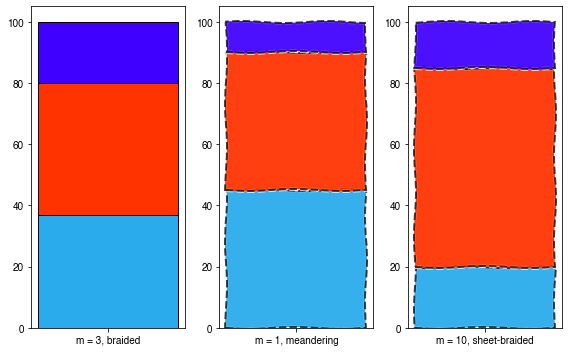

In [59]:
labels = ['m = 3, braided', 'm = 1, meandering', 'm = 10, sheet-braided']
matrix = np.array([[37, 45, 20],
         [43, 45, 65],
         [20, 10, 15]])
w = 0.5

fig, ax = plt.subplots(1, 3, figsize = (8, 5), tight_layout = True)
ax[0].bar(labels[0], matrix[0, 0], w, color = colours[0], ec = 'k')
ax[0].bar(labels[0], matrix[1, 0], w, color = colours[1], bottom = np.sum(matrix[0, 0]), ec = 'k')
ax[0].bar(labels[0], matrix[2, 0], w, color = colours[2], bottom = np.sum(matrix[0:2, 0]), ec = 'k')

with plt.xkcd():
    ax[1].bar(labels[1], matrix[0, 1], w, color = colours[0], ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[1].bar(labels[1], matrix[1, 1], w, color = colours[1], bottom = np.sum(matrix[0, 1]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[1].bar(labels[1], matrix[2, 1], w, color = colours[2], bottom = np.sum(matrix[0:2, 1]), ec = 'k', alpha = .75, lw = 2, ls = '--')
    
    ax[2].bar(labels[2], matrix[0, 2], w, color = colours[0], ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[2].bar(labels[2], matrix[1, 2], w, color = colours[1], bottom = np.sum(matrix[0, 2]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[2].bar(labels[2], matrix[2, 2], w, color = colours[2], bottom = np.sum(matrix[0:2, 2]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    
plt.savefig(f'{savefilesto}schema-m.png', dpi = 200)    

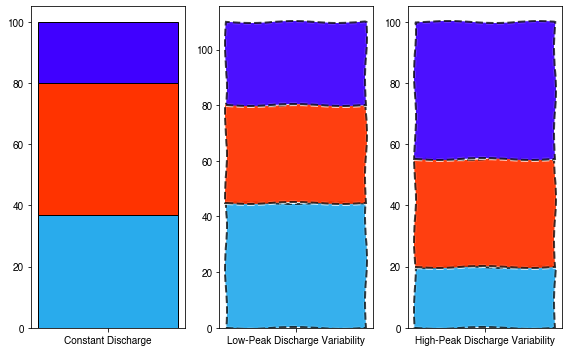

In [61]:
labels = ['Constant Discharge', 'Low-Peak Discharge Variability', 'High-Peak Discharge Variability']
matrix = np.array([[37, 45, 20],
         [43, 35, 35],
         [20, 30, 45]])
w = 0.5

fig, ax = plt.subplots(1, 3, figsize = (8, 5), tight_layout = True)
ax[0].bar(labels[0], matrix[0, 0], w, color = colours[0], ec = 'k')
ax[0].bar(labels[0], matrix[1, 0], w, color = colours[1], bottom = np.sum(matrix[0, 0]), ec = 'k')
ax[0].bar(labels[0], matrix[2, 0], w, color = colours[2], bottom = np.sum(matrix[0:2, 0]), ec = 'k')

with plt.xkcd():
    ax[1].bar(labels[1], matrix[0, 1], w, color = colours[0], ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[1].bar(labels[1], matrix[1, 1], w, color = colours[1], bottom = np.sum(matrix[0, 1]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[1].bar(labels[1], matrix[2, 1], w, color = colours[2], bottom = np.sum(matrix[0:2, 1]), ec = 'k', alpha = .75, lw = 2, ls = '--')
    
    ax[2].bar(labels[2], matrix[0, 2], w, color = colours[0], ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[2].bar(labels[2], matrix[1, 2], w, color = colours[1], bottom = np.sum(matrix[0, 2]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[2].bar(labels[2], matrix[2, 2], w, color = colours[2], bottom = np.sum(matrix[0:2, 2]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    
plt.savefig(f'{savefilesto}schema-dv.png', dpi = 200)